# Comparison of GDP per capita among countries of Africa and Americas


### Anna Williford, adapted from Daren Card
_February 2018_

## Introduction
Gross Domestic Product (GDP) per capita is a country's income per person. To compare GDP per capita between the countries of Africa and Americas, I used gapminder dataset available at [GAPMINDER website](https://www.gapminder.org/data/ )

## Data analysis

I downloaded dataset `gapminder.txt` to `Data` folder in my working directory. I used Linux tools and Python to work with gapminder dataset. Linux command-line tools are very useful for simple manipulation of text files while Python is a great tool for statistical analyses and data visualization. 

### Data overview 

My first step in the analysis of gapminder dataset is to know exactly what kind of data is available in the dataset.
Here are the commands I used to examine my dataset.


>```bash
> #view first and last 5 records
> head Data/gapminder.txt
> tail Data/gapminder.txt

> #check if file is tab-delimited
> head Data/gapminder.txt | cat -T

> #how many countries are in my data?
> cut -f1 Data/gapminder.txt| grep -v 'country'| sort | uniq |wc -l

> #for what years do I have data?
> cut -f3 Data/gapminder.txt| grep -v 'year'|sort | uniq

> #Does every country has data for the same number of years?
> cut -f3 Data/gapminder.txt|grep -v 'year' |sort |uniq -c 
>```

The dataset contains information about life expectancy, population size and GDP per capita for 142 countries for 12 non-consecutive years ranging from 1952 to 2007.

### Analysis of GDP per capita 

My dataset is in a proper tabular format and is ready to be imported in Python. Python's Pandas package is used to represent dataset as a data frame. To make plots, I use `plotnine` package that implements `ggplot2` package from R.

In [3]:
from plotnine import *
import pandas as pd

#read data into Python
myData=pd.read_table("Data/gapminder.txt")

#view first few lines of the dataset
print(myData.head())
print("dataset dimensions: "+ str(myData.shape))

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106
dataset dimensions: (1704, 6)


#### Function definitions:
I define the following functions:

In [4]:
def SelectDataByCont(df,continents_list):
    '''function to select continents from a dataframe'''    
    NewData=myData.loc[df['continent'].isin(continents_list)]
    return NewData

def GetMeansByCategory(df,groupby_list):
    '''function to calculate the means of data grouped by user-defined category'''    
    DataMeans=df.groupby(groupby_list, as_index=False).mean()
    return DataMeans 

def MakeBarPlot(df):
    '''function to make barplot'''
    p=ggplot(df) + aes(x = 'continent', y = 'gdpPercap', fill='continent') + geom_bar(stat='stat_identity', color="grey")
    return p 


#### Analysis workflow
Functions defined above are used to compare GDP per capita between Africa and Americas in the following way:

1. Select rows with information about countries located in Africa or Americas
2. Create a data frame with mean values of gdpPercap for Africa and Americas
3. Create a barplot to visualize average GDP per capita
4. Overlay barplot with `gdpPercap` values averaged over all years for every country. This is done to visualize the variation in GDP per capita among different countries on each continent


## Results

**Step 1:** Select data for Asia and Americas

In [5]:
#make a list of continents to select
ToSelect=['Africa','Americas']

#call SelectDataByCont(df,continents_list) function
myNewData=SelectDataByCont(myData,ToSelect)

#check that myNewData only contains Asia and Americas
print(pd.unique(myNewData['continent']))


['Africa' 'Americas']


**Step 2:** Create dataframe with `gdpPercap` values averaged over all years for each continent

In [6]:
#define grouping variable as continent
groupBy=['continent']

#call GetMeansByCategory(df,groupby_list)
myNewData_meanPerCont=GetMeansByCategory(myNewData,groupBy)
print(myNewData_meanPerCont)         

  continent    year    lifeExp           pop    gdpPercap
0    Africa  1979.5  48.865330  9.916003e+06  2193.754578
1  Americas  1979.5  64.658737  2.450479e+07  7136.110356


**Step 3:** Create a barplot to visualize avergae GDP per capita for Asia and Americas

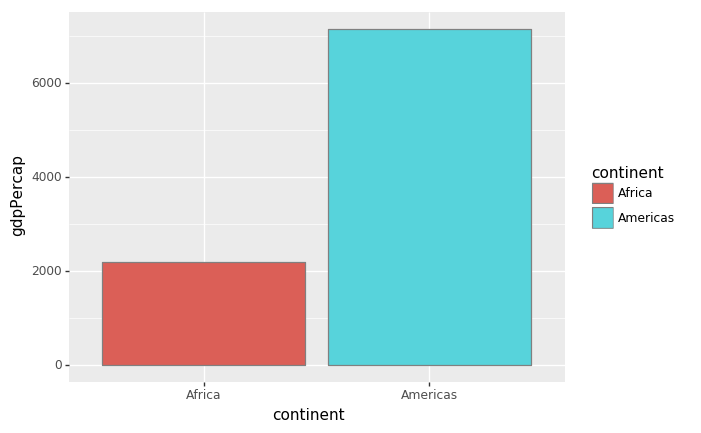

<ggplot: (12346011)>


In [7]:
#call MakeBarPlot(df)
p=MakeBarPlot(myNewData_meanPerCont)
print(p)

**Step 4:** Overlay barplot with `gdpPercap` values averaged over all years for every country. 
- 4.1 Create a new dataset with  `gdpPercap` values averaged across all years for every country and continent

In [8]:
#get averages across years for every country, keeping continents in the dataframe
#define grouping categories
groupBy_2=['continent','country']

#call GetMeansByCategory(df,groupby_list)
myNewData_meanPerCountry=GetMeansByCategory(myNewData,groupBy_2)
print(myNewData_meanPerCountry.head())

  continent       country    year    lifeExp           pop    gdpPercap
0    Africa       Algeria  1979.5  59.030167  1.987541e+07  4426.025973
1    Africa        Angola  1979.5  37.883500  7.309390e+06  3607.100529
2    Africa         Benin  1979.5  48.779917  4.017497e+06  1155.395107
3    Africa      Botswana  1979.5  54.597500  9.711862e+05  5031.503557
4    Africa  Burkina_Faso  1979.5  44.694000  7.548677e+06   843.990665


- 4.2 Add averaged `gdpPercap` values per country to barplot

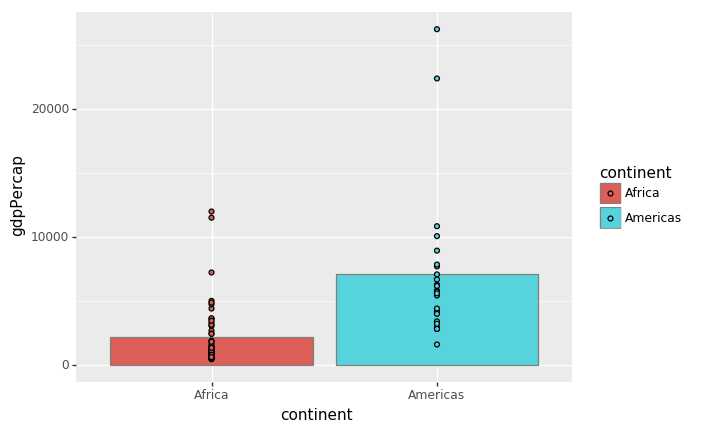

<ggplot: (12413097)>

In [9]:
#p=MakeBarPlot(myNewData_meanPerCont) from Step 3
p+geom_point(myNewData_meanPerCountry,aes(x = 'continent',  y = 'gdpPercap') )

The final image can be saved as GDP_Africa_America.png with this command:
>```Python
>p1=p+geom_point(myNewData_meanPerCountry,aes(x = 'continent',  y = 'gdpPercap') )
>p1.save(filename="GDP_Africa_America.png", height=4, width=5, units = 'in')
>```

## Conclusion
There is a large variation in GDP per capita among countries of Africa and Americas. On average, Americas is about 3 times wealthier than Africa.